In [0]:
from google.colab import drive
import numpy as np
import pandas as pd
import scipy.io   
import h5py

%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
import tarfile
from IPython.display import display, Image

from scipy import ndimage

import random

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout

from sklearn import metrics

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Load dataset

In [0]:
import h5py

h5f = h5py.File('/content/drive/My Drive/Deep Learning/Project 7 NN/Dataset/SVHN_single_grey1.h5','r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_test'][:]
y_val = h5f['y_test'][:]

h5f.close()

Data Pre-Processing

In [49]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_val = X_val.reshape(X_val.shape[0], 1024)

X_train = X_train/255.0
X_val = X_val/255.0

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_val.shape, y_val.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


Exploratory Data Analysis

In [50]:
np.mean(X_train)

0.44026133

In [51]:
np.mean(y_train)

4.4985952380952385

In [52]:
np.mean(X_val)

0.44174716

In [53]:
np.mean(y_val)

4.503277777777778

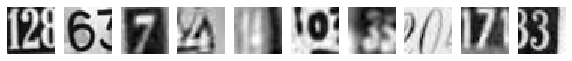

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [54]:
# visualizing the first 10 images in the dataset and their labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [55]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(42000, 1024) (18000, 1024) (42000,) (18000,)


In [56]:
X_train[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [57]:
y_train[0]

2

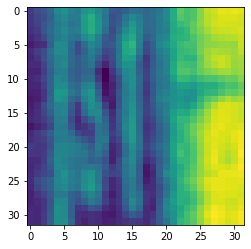

Label:  1


In [0]:
plt.imshow(X_val[0])    # show first number in the dataset
plt.show()
print('Label: ', y_val[0])

In [0]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

**KNN Classifier**



In [0]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_val, y_val)

0.32416666666666666

Finding the optimal K

In [0]:
#List of values for n_neigbours (k)
neighbours = [3,7,11,15]

ac_scores = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = knn.score(X_val, y_val)
    print("K value = {} Accuracy = {}".format(k, scores))
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]

optimal_k = neighbours[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

K value = 3 Accuracy = 0.3783888888888889
K value = 7 Accuracy = 0.28683333333333333
K value = 11 Accuracy = 0.23622222222222222
K value = 15 Accuracy = 0.201
The optimal number of neighbors is 3


In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_val)

Classification Metrics

In [0]:
print(metrics.classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.34      0.68      0.46      1814
           1       0.40      0.71      0.52      1828
           2       0.49      0.54      0.51      1803
           3       0.35      0.38      0.36      1719
           4       0.60      0.56      0.58      1812
           5       0.45      0.32      0.37      1768
           6       0.48      0.31      0.38      1832
           7       0.78      0.55      0.64      1808
           8       0.45      0.25      0.32      1812
           9       0.60      0.32      0.41      1804

    accuracy                           0.46     18000
   macro avg       0.49      0.46      0.46     18000
weighted avg       0.50      0.46      0.46     18000



**Nerural Network**

We will build a Neural Network, improving the accuracy in every step by trying different combinations.

Model 1: Naive MLP model without any alterations

In [60]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3087 - accuracy: 0.1149
Epoch 2/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2941 - accuracy: 0.1244
Epoch 3/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2809 - accuracy: 0.1457
Epoch 4/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2666 - accuracy: 0.1756
Epoch 5/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2508 - accuracy: 0.2070
Epoch 6/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2324 - accuracy: 0.2340
Epoch 7/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2117 - accuracy: 0.2561
Epoch 8/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.1889 - accuracy: 0.2822
Epoch 9/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.1640 - accuracy: 0.3067
Epoch

In [61]:
results = model.evaluate(X_val, y_val)

18000/18000 [==============================] - 1s 70us/sample - loss: 0.9682 - accuracy: 0.7209


In [62]:
print('Test accuracy: ', round(results[1]*100,2), '%')

Test accuracy:  72.09 %


Model 2

NN with more hidden layers and ReLu

In [63]:
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 19us/sample - loss: 2.3041 - accuracy: 0.1008
Epoch 2/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2992 - accuracy: 0.1110
Epoch 3/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2953 - accuracy: 0.1203
Epoch 4/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2908 - accuracy: 0.1337
Epoch 5/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2852 - accuracy: 0.1510
Epoch 6/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2782 - accuracy: 0.1690
Epoch 7/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2691 - accuracy: 0.1909
Epoch 8/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2577 - accuracy: 0.2096
Epoch 9/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2435 - accuracy: 0.2292
Epoch

In [64]:
results = model.evaluate(X_val, y_val)

18000/18000 [==============================] - 1s 69us/sample - loss: 0.8956 - accuracy: 0.7342


In [65]:
print('Test accuracy: ', round(results[1]*100,2), '%')

Test accuracy:  73.42 %


Model 3: Changing Number of activators

In [66]:
model = Sequential()
model.add(Dense(70, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.3036 - accuracy: 0.1113
Epoch 2/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2941 - accuracy: 0.1283
Epoch 3/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2874 - accuracy: 0.1431
Epoch 4/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2789 - accuracy: 0.1631
Epoch 5/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2680 - accuracy: 0.1833
Epoch 6/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2539 - accuracy: 0.2061
Epoch 7/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.2349 - accuracy: 0.2219
Epoch 8/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2092 - accuracy: 0.2390
Epoch 9/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.1751 - accuracy: 0.2593
Epoch

In [67]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 1s 67us/sample - loss: 0.8511 - accuracy: 0.7439
Test accuracy:  74.39 %


Model 4: With Weight Initializers

In [68]:
model = Sequential()
model.add(Dense(70, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(50, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.3457 - accuracy: 0.1143
Epoch 2/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2921 - accuracy: 0.1314
Epoch 3/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2659 - accuracy: 0.1556
Epoch 4/100
42000/42000 [==============================] - 1s 15us/sample - loss: 2.2381 - accuracy: 0.1756
Epoch 5/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2016 - accuracy: 0.2003
Epoch 6/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.1586 - accuracy: 0.2234
Epoch 7/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.1091 - accuracy: 0.2417
Epoch 8/100
42000/42000 [==============================] - 1s 13us/sample - loss: 2.0576 - accuracy: 0.2645
Epoch 9/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.0022 - accuracy: 0.2862
Epoch

In [69]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 1s 67us/sample - loss: 0.8066 - accuracy: 0.7633
Test accuracy:  76.33 %


Model 5: Adding Batch Normalization

In [70]:
model = Sequential()
model.add(Dense(70, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(50, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal',bias_initializer='he_uniform'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 29us/sample - loss: 2.3311 - accuracy: 0.1772
Epoch 2/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.9635 - accuracy: 0.3262
Epoch 3/100
42000/42000 [==============================] - 1s 17us/sample - loss: 1.7445 - accuracy: 0.4378
Epoch 4/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.5745 - accuracy: 0.5180
Epoch 5/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.4408 - accuracy: 0.5714
Epoch 6/100
42000/42000 [==============================] - 1s 17us/sample - loss: 1.3305 - accuracy: 0.6066
Epoch 7/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.2447 - accuracy: 0.6315
Epoch 8/100
42000/42000 [==============================] - 1s 17us/sample - loss: 1.1708 - accuracy: 0.6539
Epoch 9/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.1120 - accuracy: 0.6690
Epoch

In [71]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 1s 77us/sample - loss: 0.9435 - accuracy: 0.7306
Test accuracy:  73.06 %


Model 6: Adding Dropouts

In [0]:
def mlp_model():
        model = Sequential()
        model.add(Dense(70, input_shape = (1024, ), kernel_initializer='he_normal'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(50, kernel_initializer='he_normal',bias_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(30, kernel_initializer='he_normal',bias_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(10, kernel_initializer='he_normal',bias_initializer='he_uniform'))
        model.add(Activation('softmax'))

        sgd = optimizers.SGD(lr = 0.01)
        model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
        return model

In [73]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 31us/sample - loss: 2.5600 - accuracy: 0.1199
Epoch 2/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.3232 - accuracy: 0.1619
Epoch 3/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.1943 - accuracy: 0.2055
Epoch 4/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.0890 - accuracy: 0.2497
Epoch 5/100
42000/42000 [==============================] - 1s 18us/sample - loss: 2.0064 - accuracy: 0.2869
Epoch 6/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.9309 - accuracy: 0.3167
Epoch 7/100
42000/42000 [==============================] - 1s 19us/sample - loss: 1.8775 - accuracy: 0.3419
Epoch 8/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.8169 - accuracy: 0.3690
Epoch 9/100
42000/42000 [==============================] - 1s 18us/sample - loss: 1.7620 - accuracy: 0.3880
Epoch

In [74]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 1s 76us/sample - loss: 0.7326 - accuracy: 0.7809
Test accuracy:  78.09 %


Model 7: Changing batch size and epochs

In [84]:
model = mlp_model()
history = model.fit(X_train, y_train, batch_size = 50, epochs = 200, verbose = 1)

Train on 42000 samples
Epoch 1/200
42000/42000 [==============================] - 4s 85us/sample - loss: 2.3598 - accuracy: 0.1554
Epoch 2/200
42000/42000 [==============================] - 3s 63us/sample - loss: 2.0283 - accuracy: 0.2678
Epoch 3/200
42000/42000 [==============================] - 3s 65us/sample - loss: 1.8572 - accuracy: 0.3395
Epoch 4/200
42000/42000 [==============================] - 3s 66us/sample - loss: 1.7342 - accuracy: 0.3951
Epoch 5/200
42000/42000 [==============================] - 3s 65us/sample - loss: 1.6313 - accuracy: 0.4373
Epoch 6/200
42000/42000 [==============================] - 3s 65us/sample - loss: 1.5589 - accuracy: 0.4646
Epoch 7/200
42000/42000 [==============================] - 3s 65us/sample - loss: 1.5033 - accuracy: 0.4911
Epoch 8/200
42000/42000 [==============================] - 3s 68us/sample - loss: 1.4572 - accuracy: 0.5055
Epoch 9/200
42000/42000 [==============================] - 3s 68us/sample - loss: 1.4106 - accuracy: 0.5273
Epoch

In [85]:
results = model.evaluate(X_val, y_val)
print('Test accuracy: ', round(results[1]*100,2), '%')

18000/18000 [==============================] - 1s 77us/sample - loss: 0.6161 - accuracy: 0.8147
Test accuracy:  81.47 %


Preditcing values for test data set

In [0]:
y_predict = model.predict(X_val)

In [0]:
X_test_plt = X_val.reshape(X_val.shape[0], 32,32)
plt.figure(figsize=(3, 3))
plt.imshow(X_test_plt[365])    
plt.show()
print('Label: ', y_val[365])

Conclusion

In [22]:
col_names =  ['Model Type', 'Test Score']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison.loc[len(model_comparison)] = 'KNN', round(0.46*100,2)
model_comparison.loc[len(model_comparison)] = 'NN', round(0.8165*100,2)
model_comparison

,Model Type,Test Score
0,KNN,46.00
1,NN,81.65


We can see that for KNN Classifier, the accuracy in Test set is about 46% while that for a Neural Network is 81%. It is almost double the accuracy when we are using a fully connected Neural Network. Also, due to the large volume of data, both in height and width, the KNN took a long time to execute, while NN was very faster.

We can conclude that Neural Networks works better for such image classification problem than traditional KNN, in terms of performance and accuracy both.